In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
##1.讀入 MNSIT 數據

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.datasets import fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [6]:
len(x_train)

60000

In [7]:
len(y_train)

60000

In [8]:
len(y_test)

10000

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
n=1111
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
y_train[n]

5

這是 Sandal


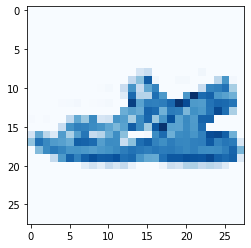

In [14]:
n = 1111
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Blues');

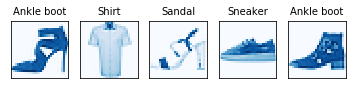

In [15]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Blues')

In [16]:
# 觀察資料幾筆

In [21]:
x_train.shape

(60000, 28, 28)

In [20]:
x_test.shape

(10000, 28, 28)

In [22]:
x_train[n]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [25]:
#像素的最大值
np.max(x_train[n])

1.0851063829787233

In [26]:
print(set(y_train))#有幾類

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [27]:
#處理資料

In [28]:
x_train = x_train/255
x_test = x_test/255
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [31]:
y_train[5211]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [32]:
#建立神經網絡

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [34]:
model = Sequential()
model.add(Dense(50, input_dim=784, activation='relu'))
model.add(Dense(38, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='mse', optimizer=SGD(lr=0.025), metrics=['accuracy'])

In [35]:
#觀看結構
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 38)                1938      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                390       
Total params: 41,578
Trainable params: 41,578
Non-trainable params: 0
_________________________________________________________________


In [37]:
#訓練
model.fit(x_train, y_train, batch_size=20, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0900 - accuracy: 0.2145
Epoch 2/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0900 - accuracy: 0.2306
Epoch 3/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0900 - accuracy: 0.2474
Epoch 4/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0900 - accuracy: 0.2093
Epoch 5/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0900 - accuracy: 0.2419
Epoch 6/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0900 - accuracy: 0.2325
Epoch 7/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0900 - accuracy: 0.2511
Epoch 8/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0900 - accuracy: 0.2512
Epoch 9/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0900 - accuracy: 0.2111
Epoch 10/1

In [38]:
#測試結果
result = model.predict_classes(x_test)

神經網路預測是: Trouser


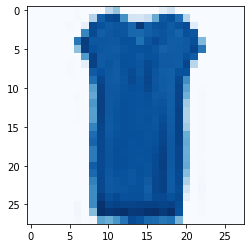

In [39]:
n = 9211
print('神經網路預測是:', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Blues')